In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('HD.csv')
# data.describe()

data = data.ffill()
data.replace('?', 0, inplace=True)

data.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1.0,7.0,1
96,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
97,60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3
98,52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0


<Axes: >

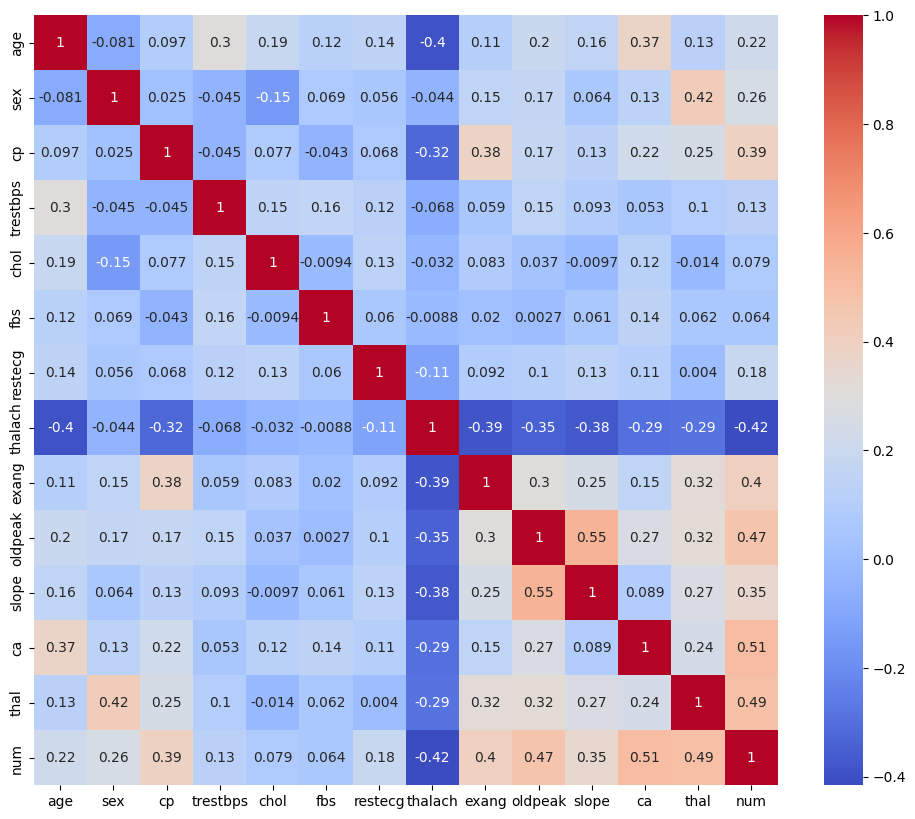

In [10]:
#Statistical Analysis and cleanup
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


data = data[(np.abs(stats.zscore(data['trestbps'])) < 3)]
data = data[(np.abs(stats.zscore(data['chol'])) < 3)]
data = data[(np.abs(stats.zscore(data['thalach'])) < 3)]
data = data[(np.abs(stats.zscore(data['oldpeak'])) < 3)]


corrmat = data.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [11]:
Y = data['num']
X = data.drop('num', axis=1)

In [12]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


Max Decision Tree score: 0.6551724137931034


In [13]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


Max KNN score: 0.6896551724137931


In [14]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=10, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params,best_score)
# implement best_params

svc = SVC(C=10, gamma='scale', kernel= 'linear')
cv_scores = cross_val_score(svc, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


Max SVC score: 0.7
